In [6]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# 2. Load the Dataset
df = pd.read_csv("sample_sales_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,OrderID,Date,Customer,Region,Product,Category,Quantity,UnitPrice,Revenue
0,1001,2025-01-05,John Doe,North,Widget A,Electronics,2,50,100
1,1002,2025-01-07,Jane Smith,South,Gadget B,Home,1,80,80
2,1003,2025-01-12,Alice Johnson,East,Widget A,Electronics,3,50,150
3,1004,2025-01-15,Bob Lee,West,Tool C,Garden,5,20,100
4,1005,2025-02-01,Sarah Kim,North,Widget B,Electronics,1,60,60


In [9]:
# 3. Basic Exploration
print(df.info())
print(df.describe())
print(df['Region'].value_counts())
print(df['Product'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderID    15 non-null     int64         
 1   Date       15 non-null     datetime64[ns]
 2   Customer   15 non-null     object        
 3   Region     15 non-null     object        
 4   Product    15 non-null     object        
 5   Category   15 non-null     object        
 6   Quantity   15 non-null     int64         
 7   UnitPrice  15 non-null     int64         
 8   Revenue    15 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ KB
None
           OrderID                 Date   Quantity  UnitPrice     Revenue
count    15.000000                   15  15.000000  15.000000   15.000000
mean   1008.000000  2025-03-02 01:36:00   2.733333  52.333333  118.666667
min    1001.000000  2025-01-05 00:00:00   1.000000  20.000000   40.000000
25%    1004

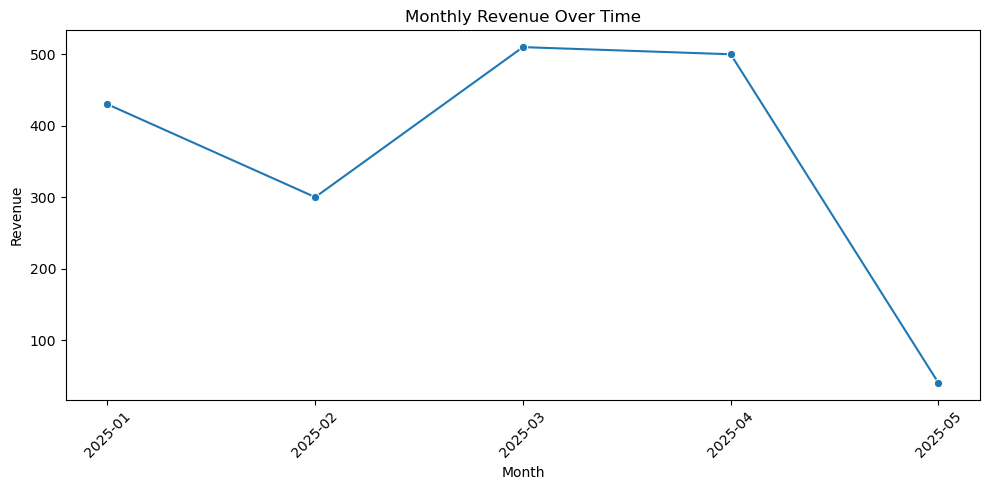

In [10]:
# 4. Revenue Over Time
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Over Time")
plt.tight_layout()
plt.show()

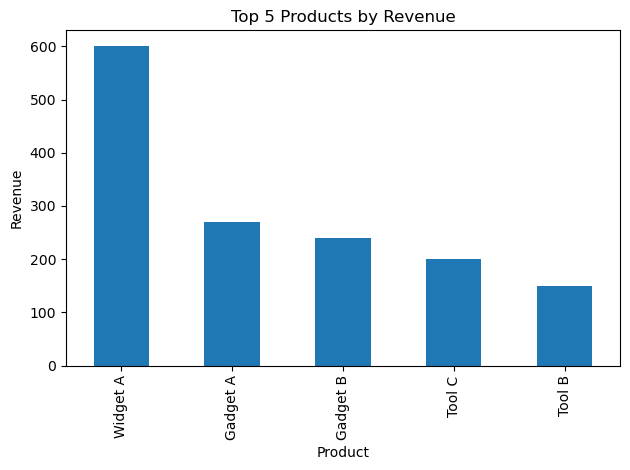

In [11]:
# 5. Top Products
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', title="Top 5 Products by Revenue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

RMSE: 26.90


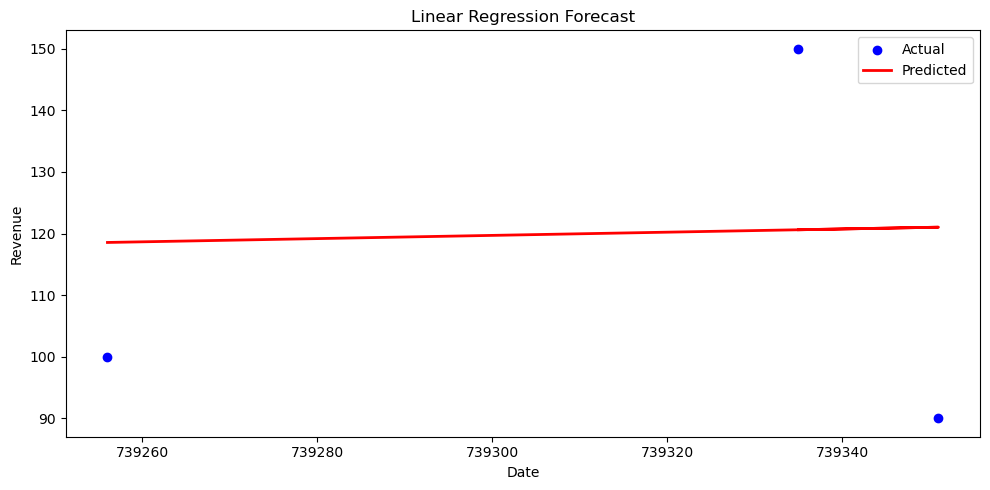

In [13]:
# 6. Forecasting: Predict Revenue using Linear Regression
df['Day'] = df['Date'].map(pd.Timestamp.toordinal)
X = df[['Day']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Linear Regression Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()